In [166]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


from datetime import datetime, timedelta
from utils import get_ticker_prices, timeseries_train_test_split, timeseries_cross_val
from tech_analysis import moving_average, exp_moving_average, \
    vol_moving_average, realized_vol, upper_shadow, lower_shadow

In [167]:
btc = get_ticker_prices('BTC-USD', start='2016-01-01', end=datetime.now()-timedelta(days=1))
sap = get_ticker_prices('^GSPC', start='2016-01-01', end=datetime.now()-timedelta(days=1))

In [168]:
btc.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-15,43101.898438,43724.671875,42669.035156,43177.398438,18371348298
2022-01-16,43172.039062,43436.808594,42691.023438,43113.878906,17902097845
2022-01-17,43118.121094,43179.390625,41680.320312,42250.550781,21690904261
2022-01-18,42250.074219,42534.402344,41392.214844,42375.632812,22417209227
2022-01-19,42374.039062,42478.304688,41242.914062,41744.328125,23091543258


In [169]:
sap.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-12,4728.589844,4748.830078,4706.709961,4726.350098,3060040000
2022-01-13,4733.560059,4744.129883,4650.290039,4659.029785,3539830000
2022-01-14,4637.990234,4665.129883,4614.750000,4662.850098,3483530000
2022-01-18,4632.240234,4632.240234,4568.700195,4577.109863,3324960000
2022-01-19,4588.029785,4611.549805,4530.200195,4532.759766,3387370000


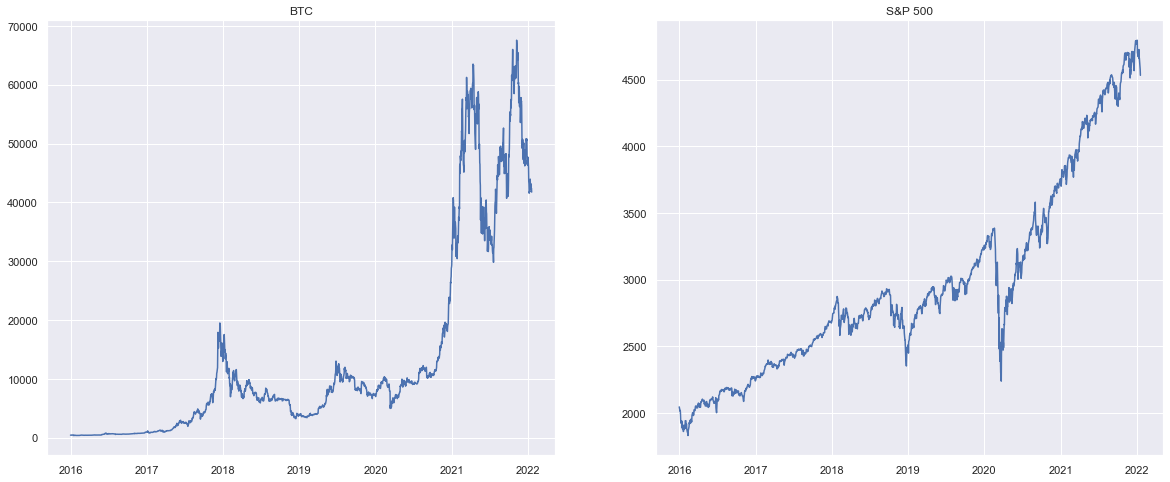

In [170]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(121)
ax1.plot(btc.Close)
ax1.set_title("BTC")

ax2 = fig.add_subplot(122)
ax2.plot(sap.Close)
ax2.set_title("S&P 500");

In [171]:
btc['MA_3'] = moving_average(btc, 3)
btc['MA_9'] = moving_average(btc, 9)

btc['EMA_3'] = exp_moving_average(btc, 3)
btc['EMA_9'] = exp_moving_average(btc, 9)

btc['VMA_3'] = vol_moving_average(btc, 3)
btc['VMA_9'] = vol_moving_average(btc, 9)

btc['Upper_shadow'] = upper_shadow(btc)
btc['Lower_shadow'] = lower_shadow(btc)

btc['High_div_low'] = btc['High'] / btc['Low']
btc['Open_sub_close'] = btc['Open'] - btc['Close']

btc['Realized_vol'] = realized_vol(btc, 30)

btc.tail()

,Open,High,Low,Close,Volume,MA_3,MA_9,EMA_3,EMA_9,VMA_3,VMA_9,Upper_shadow,Lower_shadow,High_div_low,Open_sub_close,Realized_vol
Date,,,,,,,,,,,,,,,,
2022-01-15,43101.898438,43724.671875,42669.035156,43177.398438,18371348298,42956.222656,42508.703559,43081.043103,43218.508803,2.987996e+10,3.501434e+10,547.273438,432.863281,1.024740,-75.500000,0.387497
2022-01-16,43172.039062,43436.808594,42691.023438,43113.878906,17902097845,43130.325521,42681.589844,43097.461004,43197.582823,1.995028e+10,2.764828e+10,264.769531,422.855469,1.017469,58.160156,0.378687
2022-01-17,43118.121094,43179.390625,41680.320312,42250.550781,21690904261,42847.276042,42738.990885,42674.005893,43008.176415,1.932145e+10,2.693990e+10,61.269531,570.230469,1.035966,867.570312,0.378906
2022-01-18,42250.074219,42534.402344,41392.214844,42375.632812,22417209227,42580.020833,42790.549913,42524.819353,42881.667694,2.067007e+10,2.706466e+10,158.769531,857.859375,1.027594,-125.558594,0.379344
2022-01-19,42374.039062,42478.304688,41242.914062,41744.328125,23091543258,42123.503906,42782.001736,42134.573739,42654.199781,2.239989e+10,2.606325e+10,104.265625,501.414062,1.029954,629.710938,0.380213


In [172]:
sap['MA_3'] = moving_average(sap, 3)
sap['MA_9'] = moving_average(sap, 9)

sap['EMA_3'] = exp_moving_average(sap, 3)
sap['EMA_9'] = exp_moving_average(sap, 9)

sap['VMA_3'] = vol_moving_average(sap, 3)
sap['VMA_9'] = vol_moving_average(sap, 9)

sap['Upper_shadow'] = upper_shadow(sap)
sap['Lower_shadow'] = lower_shadow(sap)

sap['High_div_low'] = sap['High'] / sap['Low']
sap['Open_sub_close'] = sap['Open'] - sap['Close']

sap['Realized_vol'] = realized_vol(sap, 21)

sap.tail()

,Open,High,Low,Close,Volume,MA_3,MA_9,EMA_3,EMA_9,VMA_3,VMA_9,Upper_shadow,Lower_shadow,High_div_low,Open_sub_close
Date,,,,,,,,,,,,,,,
2022-01-12,4728.589844,4748.830078,4706.709961,4726.350098,3060040000,4703.236654,4726.627767,4712.569799,4717.101438,3.367813e+09,3.261170e+09,20.240234,19.640137,1.008949,2.239746
2022-01-13,4733.560059,4744.129883,4650.290039,4659.029785,3539830000,4699.483236,4714.722168,4685.799792,4705.487108,3.340490e+09,3.382686e+09,10.569824,8.739746,1.020179,74.530273
2022-01-14,4637.990234,4665.129883,4614.750000,4662.850098,3483530000,4682.743327,4699.865506,4674.324945,4696.959706,3.361133e+09,3.461390e+09,2.279785,23.240234,1.010917,-24.859863
2022-01-18,4632.240234,4632.240234,4568.700195,4577.109863,3324960000,4632.996582,4675.817708,4625.717404,4672.989737,3.449440e+09,3.426269e+09,0.000000,8.409668,1.013908,55.130371
2022-01-19,4588.029785,4611.549805,4530.200195,4532.759766,3387370000,4590.906576,4657.171007,4579.238585,4644.943743,3.398620e+09,3.387806e+09,23.520020,2.559570,1.017957,55.270020


In [173]:
btc['Return'] = btc['Close'].pct_change().dropna()
sap['Return'] = sap['Close'].pct_change().dropna()

In [174]:
btc = btc.dropna()
sap = sap.dropna()

In [175]:
X_btc = btc[['MA_3','MA_9', 'Upper_shadow', 'Lower_shadow', 'High_div_low', 'Open_sub_close']] 
y_btc = btc['Close']

X_train_btc, X_test_btc, y_train_btc, y_test_btc = timeseries_train_test_split(X_btc, y_btc, test_size=0.1)

In [176]:
X_sap = sap[['MA_3','MA_9', 'Upper_shadow', 'Lower_shadow', 'High_div_low', 'Open_sub_close']] 
y_sap = sap['Close']

X_train_sap, X_test_sap, y_train_sap, y_test_sap = timeseries_train_test_split(X_sap, y_sap, test_size=0.1)

In [177]:
lr_btc = LinearRegression()
btc_score = timeseries_cross_val(lr_btc, X_train_btc, y_train_btc, n_splits=5)

lr_sap = LinearRegression()
sap_score = timeseries_cross_val(lr_sap, X_train_sap, y_train_sap, n_splits=5)

print(f"BTC model score: {btc_score}")
print(f"S&P 500 model score: {sap_score}")

BTC model score: 252.96167205425996
S&P 500 model score: 14.170422995760646


In [178]:
lr_btc.fit(X_train_btc, y_train_btc)
lr_sap.fit(X_train_sap, y_train_sap)

LinearRegression()

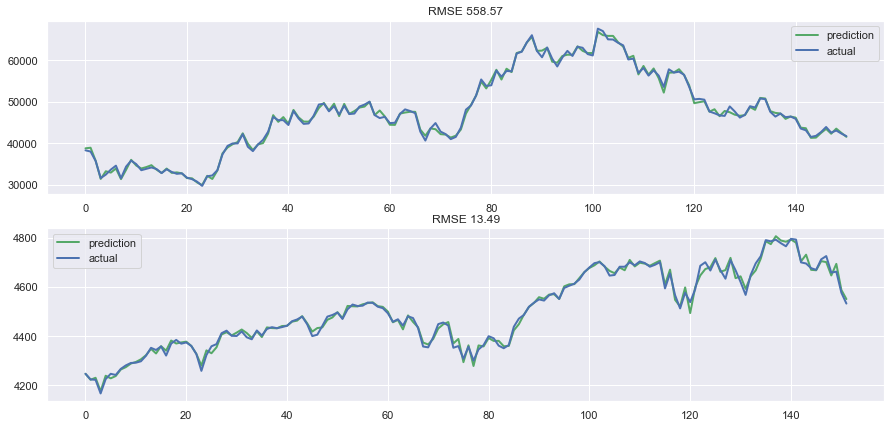

In [179]:
prediction_btc = lr_btc.predict(X_test_btc)
prediction_sap = lr_sap.predict(X_test_sap)

error_btc = np.sqrt(mean_squared_error(prediction_btc, y_test_btc))
error_sap = np.sqrt(mean_squared_error(prediction_sap, y_test_sap))

fig = plt.figure(figsize=(15, 7))

ax1 = fig.add_subplot(211)
ax1.plot(prediction_btc, "g", label="prediction", linewidth=2.0)
ax1.plot(y_test_btc.values, label="actual", linewidth=2.0)
ax1.set_title("RMSE {0:.2f}".format(error_btc))
ax1.legend(loc="best")

ax2 = fig.add_subplot(212)
ax2.plot(prediction_sap, "g", label="prediction", linewidth=2.0)
ax2.plot(y_test_sap.values, label="actual", linewidth=2.0)
ax2.set_title("RMSE {0:.2f}".format(error_sap))
ax2.legend(loc="best");

## XGBoost ##

In [180]:
X_btc = btc.drop(['Return', 'Open_sub_close'], axis=1)
y_btc = btc['Return']

X_train_btc, X_test_btc, y_train_btc, y_test_btc = timeseries_train_test_split(X_btc, y_btc, test_size=0.1)

In [181]:
X_sap = sap.drop(['Return', 'Open_sub_close'], axis=1)
y_sap = sap['Return']

X_train_sap, X_test_sap, y_train_sap, y_test_sap = timeseries_train_test_split(X_sap, y_sap, test_size=0.1)

In [182]:
xgb_btc = XGBRegressor()
btc_score = timeseries_cross_val(xgb_btc, X_train_btc, y_train_btc, n_splits=5)

xgb_sap = XGBRegressor()
sap_score = timeseries_cross_val(xgb_sap, X_train_sap, y_train_sap, n_splits=5)

print(f"BTC model score: {btc_score}")
print(f"S&P 500 model score: {sap_score}")

BTC model score: 0.054741201704152295
S&P 500 model score: 0.013793904137610667


In [183]:
xgb_btc.fit(X_train_btc, y_train_btc)
xgb_sap.fit(X_train_sap, y_train_sap);

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

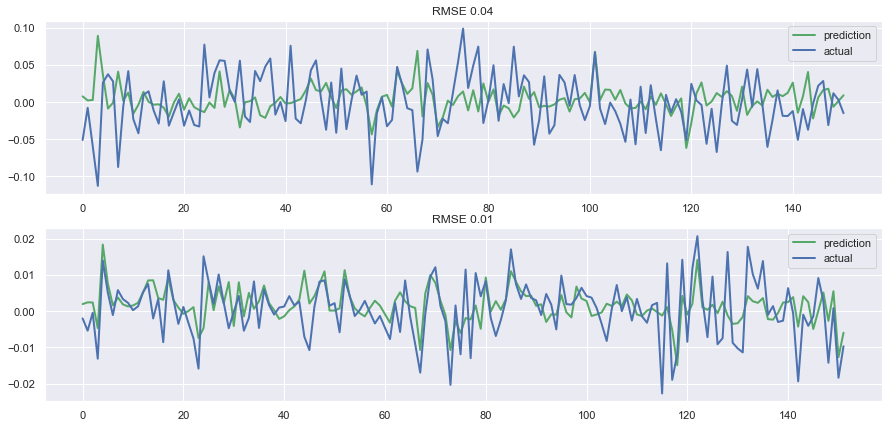

In [184]:
prediction_btc = xgb_btc.predict(X_test_btc)
prediction_sap = xgb_sap.predict(X_test_sap)

error_btc = np.sqrt(mean_squared_error(prediction_btc, y_test_btc))
error_sap = np.sqrt(mean_squared_error(prediction_sap, y_test_sap))

fig = plt.figure(figsize=(15, 7))

ax1 = fig.add_subplot(211)
ax1.plot(prediction_btc, "g", label="prediction", linewidth=2.0)
ax1.plot(y_test_btc.values, label="actual", linewidth=2.0)
ax1.set_title("RMSE {0:.2f}".format(error_btc))
ax1.legend(loc="best")

ax2 = fig.add_subplot(212)
ax2.plot(prediction_sap, "g", label="prediction", linewidth=2.0)
ax2.plot(y_test_sap.values, label="actual", linewidth=2.0)
ax2.set_title("RMSE {0:.2f}".format(error_sap))
ax2.legend(loc="best");

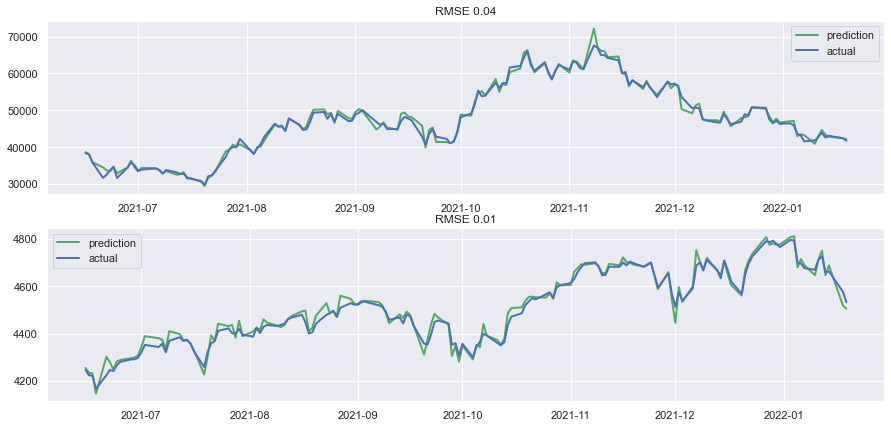

In [185]:
prediction_btc = xgb_btc.predict(X_test_btc)
prediction_sap = xgb_sap.predict(X_test_sap)

error_btc = np.sqrt(mean_squared_error(prediction_btc, y_test_btc))
error_sap = np.sqrt(mean_squared_error(prediction_sap, y_test_sap))

fig = plt.figure(figsize=(15, 7))

ax1 = fig.add_subplot(211)
ax1.plot(X_test_btc['Close']+(prediction_btc*X_test_btc['Close']), "g", label="prediction", linewidth=2.0)
ax1.plot(X_test_btc['Close'], label="actual", linewidth=2.0)
ax1.set_title("RMSE {0:.2f}".format(error_btc))
ax1.legend(loc="best")

ax2 = fig.add_subplot(212)
ax2.plot(X_test_sap['Close']+(prediction_sap*X_test_sap['Close']), "g", label="prediction", linewidth=2.0)
ax2.plot(X_test_sap['Close'], label="actual", linewidth=2.0)
ax2.set_title("RMSE {0:.2f}".format(error_sap))
ax2.legend(loc="best");

In [186]:
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
}

In [187]:
grid_search_xgb_btc = GridSearchCV(xgb_btc, hyperparameter_grid, cv=TimeSeriesSplit(n_splits=5),
                           scoring='neg_mean_squared_error',
                           return_train_score=True, 
                           n_jobs=-1)
grid_search_xgb_btc.fit(X_train_btc, y_train_btc)

grid_search_xgb_sap = GridSearchCV(xgb_sap, hyperparameter_grid, cv=TimeSeriesSplit(n_splits=5),
                           scoring='neg_mean_squared_error',
                           return_train_score=True, 
                           n_jobs=-1)
grid_search_xgb_sap.fit(X_train_sap, y_train_sap);

In [188]:
print(grid_search_xgb_btc.best_score_)
print(grid_search_xgb_sap.best_score_)

-0.0019218902815683382
-0.00010787586870458074


In [189]:
print(grid_search_xgb_btc.best_params_)
print(grid_search_xgb_sap.best_params_)

{'learning_rate': 0.2, 'max_depth': 9, 'min_child_weight': 100, 'n_estimators': 100}
{'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 100, 'n_estimators': 800}


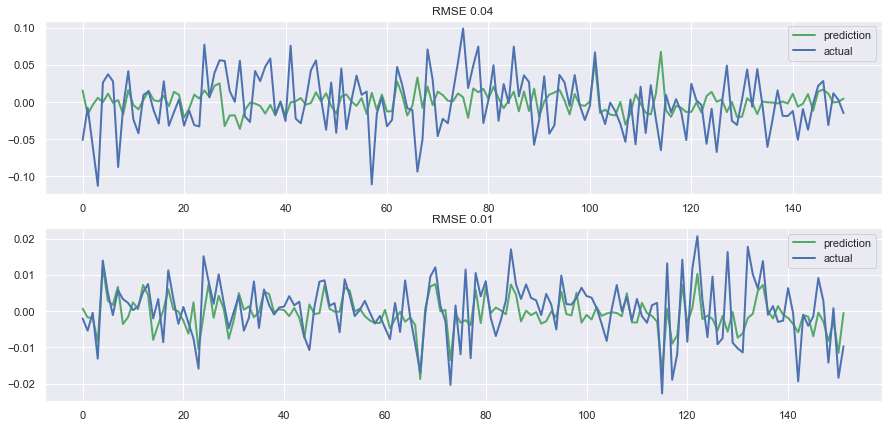

In [190]:
prediction_btc = grid_search_xgb_btc.predict(X_test_btc)
prediction_sap = grid_search_xgb_sap.predict(X_test_sap)

error_btc = np.sqrt(mean_squared_error(prediction_btc, y_test_btc))
error_sap = np.sqrt(mean_squared_error(prediction_sap, y_test_sap))

fig = plt.figure(figsize=(15, 7))

ax1 = fig.add_subplot(211)
ax1.plot(prediction_btc, "g", label="prediction", linewidth=2.0)
ax1.plot(y_test_btc.values, label="actual", linewidth=2.0)
ax1.set_title("RMSE {0:.2f}".format(error_btc))
ax1.legend(loc="best")

ax2 = fig.add_subplot(212)
ax2.plot(prediction_sap, "g", label="prediction", linewidth=2.0)
ax2.plot(y_test_sap.values, label="actual", linewidth=2.0)
ax2.set_title("RMSE {0:.2f}".format(error_sap))
ax2.legend(loc="best");